<h1 align=center> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;数据科学引论 - Python之道 </h1>

<h1 align=center> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;第8课 数据可视化 作业 - 星巴克:从西雅图到世界各地</h1>

#### 目录
1. [星巴克: 背景](#top)
1. [plotly库](#plotly)
1. [获得数据](#getdata)
1. [了解数据](#understand)

# 星巴克

<img src=https://upload.wikimedia.org/wikipedia/en/thumb/d/d3/Starbucks_Corporation_Logo_2011.svg/594px-Starbucks_Corporation_Logo_2011.svg.png width=100 align=left></img>


星巴克是一家起源于西雅图的美国咖啡公司。他们在世界各地经营着大型连锁咖啡店，拥有超过23000家分店，其中包括:
- 美国`>13000` 处
- 中国`>2700`处
- 加拿大`>1400`处 
- 日本`>1000`处 
- 韩国`>800`处

### 加载库

In [9]:
import os
import conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline

#increase figure size
from pylab import rcParams
rcParams['figure.figsize'] = (18,12)

<a id="getdata"></a>
## 获得数据

数据由 [chrismeller](https://github.com/chrismeller/StarbucksScraper)爬取供大家使用. 数据集(starbucks.csv)也已被上传到IBM Box，以方便本教程.

下载数据

In [10]:
#linux !wget --output-document /resources/data/starbucks.csv https://ibm.box.com/shared/static/o6yl1g9z9nmzl6asf4abby5gvsrjeqk3.csv
#自行下载

#### 读入数据:

创建一个变量 **`df`** 读入 **`starbucks.csv`** 内的数据.

In [18]:
import pandas as pd
import numpy as np
df = pd.read_csv("D:\A学习\大数据\8.作业\starbucks.csv")
df

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,GMT+1:00 Europe/Andorra,1.53,42.51
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.42
2,Starbucks,47089-256771,Dana Mall,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.39
3,Starbucks,22126-218024,Twofour 54,Licensed,Al Salam Street,Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.38,24.48
4,Starbucks,17127-178586,Al Ain Tower,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.54,24.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25595,Starbucks,21401-212072,Rex,Licensed,"141 Nguyễn Huệ, Quận 1, Góc đường Pasteur và L...",Thành Phố Hồ Chí Minh,SG,VN,70000,08 3824 4668,GMT+000000 Asia/Saigon,106.70,10.78
25596,Starbucks,24010-226985,Panorama,Licensed,"SN-44, Tòa Nhà Panorama, 208 Trần Văn Trà, Quận 7",Thành Phố Hồ Chí Minh,SG,VN,70000,08 5413 8292,GMT+000000 Asia/Saigon,106.71,10.72
25597,Starbucks,47608-253804,Rosebank Mall,Licensed,"Cnr Tyrwhitt and Cradock Avenue, Rosebank",Johannesburg,GT,ZA,2194,27873500159,GMT+000000 Africa/Johannesburg,28.04,-26.15
25598,Starbucks,47640-253809,Menlyn Maine,Licensed,"Shop 61B, Central Square, Cnr Aramist & Coroba...",Menlyn,GT,ZA,181,NaN,GMT+000000 Africa/Johannesburg,28.28,-25.79


删除Postcode这一列

In [17]:
del df['Postcode']
df

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Phone Number,Timezone,Longitude,Latitude
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,376818720,GMT+1:00 Europe/Andorra,1.53,42.51
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE,NaN,GMT+04:00 Asia/Dubai,55.47,25.42
2,Starbucks,47089-256771,Dana Mall,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,AJ,AE,NaN,GMT+04:00 Asia/Dubai,55.47,25.39
3,Starbucks,22126-218024,Twofour 54,Licensed,Al Salam Street,Abu Dhabi,AZ,AE,NaN,GMT+04:00 Asia/Dubai,54.38,24.48
4,Starbucks,17127-178586,Al Ain Tower,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,AZ,AE,NaN,GMT+04:00 Asia/Dubai,54.54,24.51
...,...,...,...,...,...,...,...,...,...,...,...,...
25595,Starbucks,21401-212072,Rex,Licensed,"141 Nguyễn Huệ, Quận 1, Góc đường Pasteur và L...",Thành Phố Hồ Chí Minh,SG,VN,08 3824 4668,GMT+000000 Asia/Saigon,106.70,10.78
25596,Starbucks,24010-226985,Panorama,Licensed,"SN-44, Tòa Nhà Panorama, 208 Trần Văn Trà, Quận 7",Thành Phố Hồ Chí Minh,SG,VN,08 5413 8292,GMT+000000 Asia/Saigon,106.71,10.72
25597,Starbucks,47608-253804,Rosebank Mall,Licensed,"Cnr Tyrwhitt and Cradock Avenue, Rosebank",Johannesburg,GT,ZA,27873500159,GMT+000000 Africa/Johannesburg,28.04,-26.15
25598,Starbucks,47640-253809,Menlyn Maine,Licensed,"Shop 61B, Central Square, Cnr Aramist & Coroba...",Menlyn,GT,ZA,NaN,GMT+000000 Africa/Johannesburg,28.28,-25.79


替换所有的nan为0

In [20]:
df.replace(np.nan, "0", inplace = True)
df

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,GMT+1:00 Europe/Andorra,1.53,42.51
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE,0,0,GMT+04:00 Asia/Dubai,55.47,25.42
2,Starbucks,47089-256771,Dana Mall,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,AJ,AE,0,0,GMT+04:00 Asia/Dubai,55.47,25.39
3,Starbucks,22126-218024,Twofour 54,Licensed,Al Salam Street,Abu Dhabi,AZ,AE,0,0,GMT+04:00 Asia/Dubai,54.38,24.48
4,Starbucks,17127-178586,Al Ain Tower,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,AZ,AE,0,0,GMT+04:00 Asia/Dubai,54.54,24.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25595,Starbucks,21401-212072,Rex,Licensed,"141 Nguyễn Huệ, Quận 1, Góc đường Pasteur và L...",Thành Phố Hồ Chí Minh,SG,VN,70000,08 3824 4668,GMT+000000 Asia/Saigon,106.7,10.78
25596,Starbucks,24010-226985,Panorama,Licensed,"SN-44, Tòa Nhà Panorama, 208 Trần Văn Trà, Quận 7",Thành Phố Hồ Chí Minh,SG,VN,70000,08 5413 8292,GMT+000000 Asia/Saigon,106.71,10.72
25597,Starbucks,47608-253804,Rosebank Mall,Licensed,"Cnr Tyrwhitt and Cradock Avenue, Rosebank",Johannesburg,GT,ZA,2194,27873500159,GMT+000000 Africa/Johannesburg,28.04,-26.15
25598,Starbucks,47640-253809,Menlyn Maine,Licensed,"Shop 61B, Central Square, Cnr Aramist & Coroba...",Menlyn,GT,ZA,181,0,GMT+000000 Africa/Johannesburg,28.28,-25.79


<a id="understand"></a>
## 了解数据

#### 查看数据前几行:

In [21]:
df.head()

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,GMT+1:00 Europe/Andorra,1.53,42.51
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE,0,0,GMT+04:00 Asia/Dubai,55.47,25.42
2,Starbucks,47089-256771,Dana Mall,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,AJ,AE,0,0,GMT+04:00 Asia/Dubai,55.47,25.39
3,Starbucks,22126-218024,Twofour 54,Licensed,Al Salam Street,Abu Dhabi,AZ,AE,0,0,GMT+04:00 Asia/Dubai,54.38,24.48
4,Starbucks,17127-178586,Al Ain Tower,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,AZ,AE,0,0,GMT+04:00 Asia/Dubai,54.54,24.51


#### 查看数据中每一列的类型

In [22]:
df.dtypes

Brand             object
Store Number      object
Store Name        object
Ownership Type    object
Street Address    object
City              object
State/Province    object
Country           object
Postcode          object
Phone Number      object
Timezone          object
Longitude         object
Latitude          object
dtype: object

#### 数据中一共有几处地点?

In [25]:
df.rename(columns={'Street Address':'Street_Address'}, inplace=True)
df.Street_Address.unique().shape[0]

25354

#### 数据集中一共有几家分店

In [26]:
df.rename(columns={'Store Number':'Store_Number'}, inplace=True)
df.Store_Number.unique().shape[0]

25599

#### 美国有几家分店?

In [37]:
dfus = df.loc[df['Country']=='US']
dfus.Store_Number.unique().shape[0]

13608

#### 中国有几家分店?

In [38]:
dfcn = df.loc[df['Country']=='CN']
dfcn.Store_Number.unique().shape[0]

2734

#### 在地图上绘制出每家中国分店

39.9 116.32
39.97 116.32
39.95 116.47
39.97 116.45
39.93 116.46
39.92 116.36
39.91 116.43
40.1 116.29
39.91 116.42
39.98 116.49
39.91 116.45
39.99 116.42
39.89 116.45
39.93 116.44
39.91 116.38
40.05 116.36
39.89 116.66
39.91 116.28
40.08 116.6
39.82 116.3
40.0 116.48
39.99 116.43
39.95 116.46
39.91 116.31
39.94 116.4
39.78 116.53
39.91 116.41
39.9 116.42
39.93 116.46
39.91 116.48
40.08 116.59
39.92 116.41
39.9 116.4
39.86 116.44
40.04 116.31
39.96 116.38
40.0 116.49
39.9 116.32
39.87 116.31
39.88 116.49
39.91 116.37
39.96 116.47
39.91 116.45
39.95 116.55
39.91 116.46
40.0 116.49
39.93 116.45
39.99 116.48
39.9 116.43
39.95 116.32
39.92 116.45
39.91 116.3
39.93 116.36
39.98 116.32
39.87 116.43
40.03 116.42
39.9 116.38
39.89 116.46
40.65 117.28
39.91 116.44
39.89 116.27
39.91 116.64
40.02 116.47
39.91 116.35
39.87 116.39
39.69 116.32
39.91 116.46
39.91 116.37
40.04 116.51
39.92 116.46
39.91 116.47
39.82 116.37
40.09 116.53
39.91 116.36
39.91 116.41
39.92 116.42
39.93 116.39
39.87 116.38
3

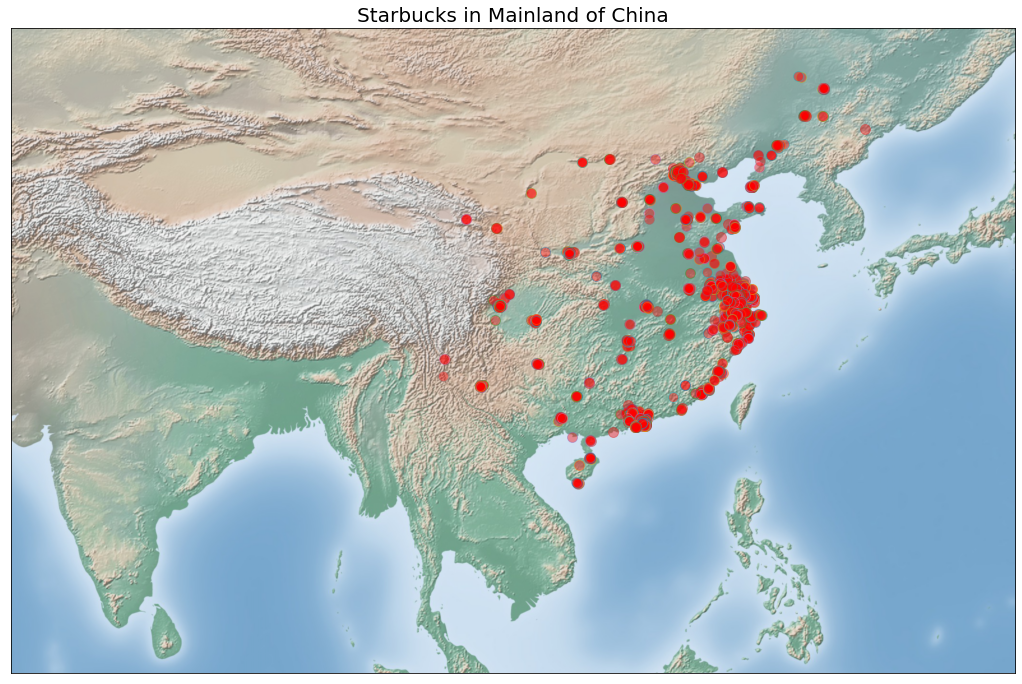

In [50]:
my_map = Basemap(
            llcrnrlon=70, llcrnrlat=5, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=140, urcrnrlat=50) #max longitude (urcrnrlon) and latitude (urcrnrlat)

lon_list = dfcn.Longitude.values
lat_list = dfcn.Latitude.values


for (lat, lon) in zip(lat_list, lon_list):
    print (lat,lon)
    
    my_map.plot(lon, 
                lat,
                markerfacecolor = 'red', 
                marker='o', 
                markersize= (10), 
                alpha = 0.4)
    

    
    
#add title
plt.title("Starbucks in Mainland of China", fontsize = 20)

my_map.shadedrelief()